# Unit 5 - Financial Planning


In [1]:
# Import Dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Load .env Enviroment Variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set Current Crypto Assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch Current BTC Price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch Current ETH Price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute Current Value of Crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print Current Crypto Wallet Balances
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20045.71
The current value of your 5.3 ETH is $2432.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current Amount of Shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API Object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format Date as ISO Format
today = pd.Timestamp("2020-11-13", tz="America/New_York").isoformat()

# Set Tickers
tickers = ["AGG", "SPY"]

# Set Timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current Closing Prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open    high     low  close   volume    open   
time                                                                        
2020-11-13 00:00:00-05:00  117.52  117.69  117.52  117.6  2832393  355.27   

                                                             
                             high     low   close    volume  
time                                                         
2020-11-13 00:00:00-05:00  357.81  354.71  357.33  34319763

In [9]:
# Pick AGG and SPY Close Prices
agg_close_price = df_portfolio["AGG"]["close"].iloc[0]
spy_close_price = df_portfolio["SPY"]["close"].iloc[0]

# Print AGG and SPY Close Prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.6
Current SPY closing price: $357.33


In [10]:
# Compute the Current Value of Shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print Current Value of Shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17866.50
The current value of your 200 AGG shares is $23520.00


### Savings Health Analysis

In [11]:
# Set Monthly Household Income
monthly_income = 12000

# Create Savings Dictionary
amount_data = {
    "amount": [(my_btc_value + my_eth_value), (my_spy_value + my_agg_value)]
}

# Create Index Ticks
ticks = ["crypto", "shares"]

# Create Savings DataFrame
df_savings = pd.DataFrame(amount_data, index=ticks)

# Display Savings DataFrame
display(df_savings)

,amount
crypto,22478.518
shares,41386.500


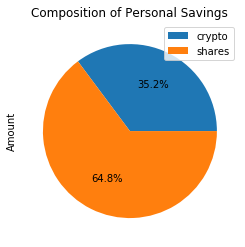

In [12]:
# Plot Savings Pie Chart
plt.pie(np.array(df_savings["amount"]).ravel(), autopct="%1.1f%%");

# Set Title
plt.title("Composition of Personal Savings")

# Set Y Label
plt.ylabel("Amount")

# Set Legend
plt.legend(df_savings.index);

In [13]:
# Set Ideal Emergency Fund
emergency_fund = monthly_income * 3

# Calculate Total Amount of Savings
savings = df_savings["amount"].sum()

# Calculate Savings Delta
delta = round(savings - emergency_fund,2)

# Calculate Goal Needs
goal_needs = round((emergency_fund - savings),2)

# Validate Savings Health
if savings > emergency_fund:
    print(f"Congratulations! You are over your savings goal by ${delta}")
elif savings == emergency_fund:
    print(f"Congratulations! You have reached your savings goal.")
else:
    print(f"You still need to save ${goal_needs} to reach your goal.")
    

Congratulations! You are over your savings goal by $27865.02


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set Start and End Dates of Five Years Back
start_date = pd.Timestamp('2015-11-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-13', tz='America/New_York').isoformat()

In [15]:
# Get 5 Years' Worth of Historical Data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2015-11-13 00:00:00-05:00  108.48  108.59  108.4459  108.57  2714199  204.35   
2015-11-16 00:00:00-05:00  108.63  108.70  108.5600  108.63  3037233  202.32   
2015-11-17 00:00:00-05:00  108.49  108.78  108.3600  108.71  2111084  205.99   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597  206.04   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263  208.59   
...                           ...     ...       ...     ...      ...     ...   
2020-11-09 00:00:00-05:00  117.40  117.47  117.0600  117.24  6073474  363.97   
2020-11-10 00:00:00-05:00  117.05  117.23  117.0300  117.05  4663301  353.49   
2020-11-11 00:00:00-05:00  117.06  117.18  117.0200  117.15  3001773  356.40   
2020-11-12 00:00:00-05:00  117.37  117.63  117.3300  117.62  7438935  355.58   
2020-11-13 00:00:00-05:00  117.52  117.69  117.5200  117.60  2832393  355.27   

                                                                 
                               high      low   close     volume  
time                                                             
2015-11-13 00:00:00-05:00  204.6700  202.435  202.54  120335951  
2015-11-16 00:00:00-05:00  205.6400  202.180  205.60   90591238  
2015-11-17 00:00:00-05:00  207.0400  204.880  205.38  100515112  
2015-11-18 00:00:00-05:00  208.9000  205.990  208.71   94448031  
2015-11-19 00:00:00-05:00  209.0500  208.200  208.53   61897641  
...                             ...      ...     ...        ...  
2020-11-09 00:00:00-05:00  364.3800  354.060  354.54  140613847  
2020-11-10 00:00:00-05:00  355.1800  350.510  354.07   69143380  
2020-11-11 00:00:00-05:00  357.5600  355.060  356.62   45627772  
2020-11-12 00:00:00-05:00  356.7182  351.260  353.28   57393573  
2020-11-13 00:00:00-05:00  357.8100  354.710  357.33   34319763  

[1260 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo Simulation to Forecast 30 years Cumulative Returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Print Aimulation Input Data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2015-11-13 00:00:00-05:00  108.48  108.59  108.4459  108.57  2714199   
2015-11-16 00:00:00-05:00  108.63  108.70  108.5600  108.63  3037233   
2015-11-17 00:00:00-05:00  108.49  108.78  108.3600  108.71  2111084   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2015-11-13 00:00:00-05:00          NaN  204.35  204.67  202.435  202.54   
2015-11-16 00:00:00-05:00     0.000553  202.32  205.64  202.180  205.60   
2015-11-17 00:00:00-05:00     0.000736  205.99  207.04  204.880  205.38   
2015-11-18 00:00:00-05:00    -0.000828  206.04  208.90  205.990  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.200  208.53   

                                                   
                              volume daily_return  
time                                               
2015-11-13 00:00:00-05:00  120335951          NaN  
2015-11-16 00:00:00-05:00   90591238     0.015108  
2015-11-17 00:00:00-05:00  100515112    -0.001070  
2015-11-18 00:00:00-05:00   94448031     0.016214  
2015-11-19 00:00:00-05:00   61897641    -0.000862

In [18]:
# Running a Monte Carlo Simulation to Forecast 30 Years cumulative Returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998465,0.993334,0.996930,0.998764,1.005130,1.002815,0.997789,1.004020,0.996667,0.994402,...,1.015560,1.007276,1.007250,1.008692,0.993210,0.993147,1.003410,0.995332,0.996876,1.000782
2,0.993536,0.990568,0.991886,0.992035,1.001148,0.998608,1.012295,1.003902,0.998351,1.010383,...,1.010776,1.002061,1.005287,1.012076,0.998673,0.991866,1.008237,0.997408,0.987212,0.991653
3,0.985350,0.973650,0.989229,0.986140,1.007137,0.999980,1.015662,0.987443,0.992862,1.009669,...,1.007326,0.996939,1.008180,1.016279,1.007184,0.995352,1.005122,0.995386,0.978162,0.992513
4,0.982665,0.971162,0.991099,0.989322,1.018914,1.001859,1.011026,0.985896,0.994315,1.001490,...,1.005108,1.007667,1.005790,1.017820,1.018845,0.990053,1.003427,1.003201,0.978810,1.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.278127,8.537711,3.054437,4.410247,8.704600,10.475065,2.896149,8.184049,5.668621,6.430088,...,11.170223,11.438773,12.956355,16.649552,5.097996,7.262422,9.022502,9.860287,5.655636,7.205499
7557,10.269469,8.540686,3.027382,4.427766,8.665564,10.419383,2.901271,8.181667,5.644495,6.385785,...,11.145197,11.413592,13.056857,16.553548,5.113908,7.195477,9.054230,9.811204,5.652522,7.213049
7558,10.274428,8.608121,3.029362,4.441347,8.690595,10.259639,2.906052,8.141155,5.696695,6.343541,...,11.098092,11.483335,12.989819,16.502539,5.111585,7.292184,9.034838,9.898174,5.653388,7.256295
7559,10.326366,8.606305,3.048292,4.450535,8.634387,10.262245,2.910547,8.184282,5.679115,6.361796,...,11.117573,11.493690,12.946245,16.259299,5.130431,7.317778,9.080280,9.926831,5.649613,7.228153


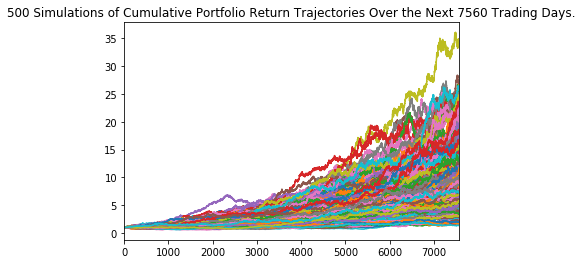

In [19]:
# Plot Simulation Outcomes
thirty_line_plot = MC_thirty_year.plot_simulation()
thirty_line_plot;

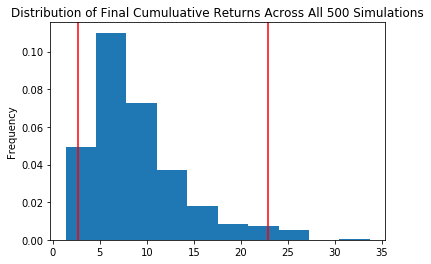

In [20]:
# Plot Probability Distribution and Confidence Intervals
thirty_dist_plot = MC_thirty_year.plot_distribution()
thirty_dist_plot;

### Retirement Analysis

In [21]:
# Fetch Summary Statistics from the Monte Carlo Simulation Results
thirty_tbl = MC_thirty_year.summarize_cumulative_return()

# Print Summary Statistics
print(thirty_tbl)

count           500.000000
mean              8.849167
std               4.981209
min               1.358449
25%               5.480979
50%               7.617707
75%              10.984845
max              33.718257
95% CI Lower      2.701069
95% CI Upper     22.892438
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set Initial Investment
thirty_initial_investment = 20000

# Use the Lower and Upper `95%` Confidence Intervals to Calculate the Range of the Possible Outcomes of $20,000
thirty_ci_lower = round(thirty_tbl[8]*thirty_initial_investment,2)
thirty_ci_upper = round(thirty_tbl[9]*thirty_initial_investment,2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${thirty_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_ci_lower} and ${thirty_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54021.39 and $457848.76


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set Initial Investment
new_initial_investment = 20000 * 1.5

# Use the Lower and Upper `95%` Confidence Intervals to Calculate the Range of the Possible Outcomes of $30,000
thirty_ci_lower = round(thirty_tbl[8]*new_initial_investment,2)
thirty_ci_upper = round(thirty_tbl[9]*new_initial_investment,2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${new_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_ci_lower} and ${thirty_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81032.08 and $686773.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo Simulation to Forecast 5 years Cumulative Returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo Simulation to Forecast 5 Years Cumulative Returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994683,0.998455,1.005116,0.996227,1.006473,0.997935,1.012737,1.005223,0.990870,0.987953,...,0.997298,1.008386,0.996322,1.000772,0.995927,0.991300,1.008262,0.987078,0.990636,1.001873
2,0.991638,1.000454,1.010637,1.001092,1.000852,1.002287,1.012629,0.998202,1.005028,0.984853,...,1.000977,1.014412,0.991410,1.001579,0.998818,0.991538,1.004613,0.982222,0.995028,1.003552
3,0.995819,1.004444,1.007284,1.008988,1.007159,1.003179,1.013750,0.994270,0.997681,0.978530,...,1.000882,1.014033,1.006209,1.006841,0.994451,0.996951,1.012000,0.989675,0.992349,0.987781
4,1.008565,1.010567,1.000267,1.013248,1.014768,1.000088,1.008456,1.010638,1.005117,0.989162,...,0.994762,1.025604,1.018752,1.023580,0.993143,1.000966,1.008625,0.992253,0.993701,0.983215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.304939,1.348375,1.314034,1.017539,0.903115,0.987024,1.388340,1.755971,1.213283,1.233739,...,1.507961,1.069858,1.775998,1.340449,1.525531,1.451002,1.283005,1.224786,1.405479,1.642007
1257,1.296232,1.342670,1.311186,1.018523,0.900158,0.981601,1.400109,1.746330,1.226272,1.228307,...,1.508570,1.082733,1.754724,1.342310,1.534077,1.452631,1.280334,1.229252,1.399715,1.634892
1258,1.296953,1.351561,1.302071,1.014741,0.892254,0.997809,1.398121,1.768497,1.222433,1.232565,...,1.497845,1.084387,1.742864,1.345197,1.532317,1.442608,1.284810,1.217565,1.398100,1.634033
1259,1.271747,1.354637,1.308533,1.020171,0.890649,0.992546,1.380618,1.767299,1.229625,1.244510,...,1.495703,1.093263,1.724657,1.362679,1.519209,1.437071,1.293098,1.209585,1.402076,1.617303


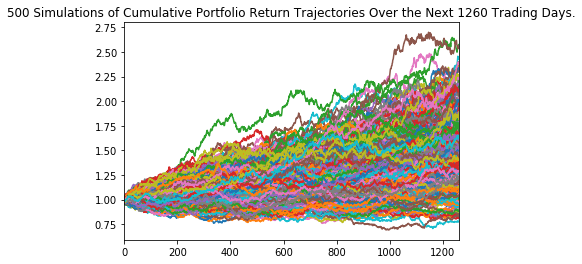

In [26]:
# Plot Simulation Outcomes
five_line_plot = MC_five_year.plot_simulation()
five_line_plot;

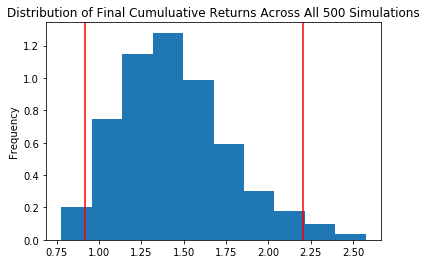

In [27]:
# Plot Probability Distribution and Confidence Intervals
five_dist_plot = MC_five_year.plot_distribution()
five_dist_plot;

In [28]:
# Fetch Summary Statistics from the Monte Carlo Simulation Results
five_tbl = MC_five_year.summarize_cumulative_return()

# Print Summary Statistics
print(five_tbl)

count           500.000000
mean              1.449423
std               0.328749
min               0.777198
25%               1.221647
50%               1.411166
75%               1.641389
max               2.574520
95% CI Lower      0.917903
95% CI Upper      2.201592
Name: 1260, dtype: float64


In [29]:
# Set Initial Investment
five_initial_investment = 60000

# Use the Lower and Upper `95%` Confidence Intervals to Calculate the Range of the Possible Outcomes of $60,000
five_ci_lower = round(five_tbl[8]*five_initial_investment,2)
five_ci_upper = round(five_tbl[9]*five_initial_investment,2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${five_ci_lower} and ${five_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55074.16 and $132095.5


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo Simulation to Forecast 10 Years Cumulative Returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo Simulation to Forecast 10 Years Sumulative Returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990468,1.011383,0.995587,0.999300,1.005708,1.000496,1.009064,0.994995,1.001803,0.995852,...,1.007144,1.015720,0.997502,1.001740,0.987033,0.997075,0.996400,1.002559,0.990995,1.005174
2,0.983500,0.999722,0.998210,0.990237,1.003976,1.012455,1.017308,0.990190,0.998104,1.001765,...,1.007437,1.030062,0.996896,0.999482,0.987753,0.992281,1.001031,1.012091,0.991984,1.007839
3,0.981399,0.994262,0.991736,1.001521,1.006953,1.013846,1.010780,0.987974,0.995722,1.002379,...,1.005943,1.038286,0.996189,1.004237,0.983903,0.995677,0.996319,1.002087,0.994452,1.013684
4,0.979766,1.003108,0.992665,1.005967,1.008435,1.009263,1.015055,0.996390,0.993921,0.991708,...,1.014940,1.041757,1.005680,1.001533,0.975622,1.000361,0.993458,1.006872,0.994568,1.028186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.388556,1.316569,1.895369,1.976523,2.972549,1.612560,2.466829,1.545349,3.117427,1.486072,...,2.021071,2.721363,1.889393,1.588898,2.098329,1.173623,2.382943,1.228168,2.485571,2.608940
2517,2.386617,1.323439,1.895123,1.983873,2.983492,1.605080,2.435687,1.526058,3.101323,1.474998,...,2.007253,2.698896,1.886759,1.595982,2.099262,1.183919,2.356194,1.227981,2.501135,2.610514
2518,2.399401,1.324432,1.887398,1.970714,2.987209,1.595080,2.432405,1.525674,3.120684,1.481369,...,2.016848,2.683306,1.859635,1.591123,2.112930,1.203436,2.355677,1.239740,2.523923,2.598776
2519,2.412020,1.327992,1.912242,1.970235,2.991076,1.597774,2.435708,1.511006,3.108882,1.497911,...,1.995316,2.695574,1.848266,1.592554,2.117790,1.203841,2.347779,1.244549,2.513000,2.606863


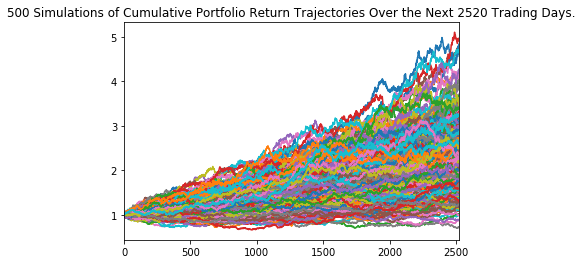

In [32]:
# Plot Simulation Outcomes
ten_line_plot = MC_ten_year.plot_simulation()
ten_line_plot;

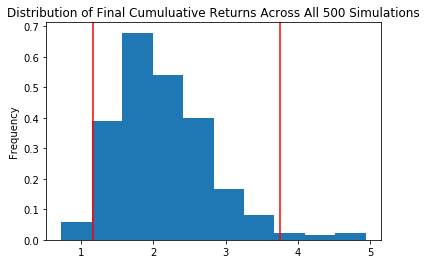

In [33]:
# Plot Probability Distribution and Confidence Intervals
ten_dist_plot = MC_ten_year.plot_distribution()
ten_dist_plot;

In [34]:
# Fetch Summary Statistics from the Monte Carlo Simulation Results
ten_tbl = MC_ten_year.summarize_cumulative_return()

# Print Summary Statistics
print(ten_tbl)

count           500.000000
mean              2.142015
std               0.662288
min               0.728757
25%               1.679145
50%               2.030894
75%               2.508498
max               4.938214
95% CI Lower      1.171588
95% CI Upper      3.758321
Name: 2520, dtype: float64


In [35]:
# Set Initial Investment
ten_initial_investment = 60000

# Use the Lower and Upper `95%` Confidence Intervals to Calculate the Range of the Possible Outcomes of $60,000
ten_ci_lower = round(ten_tbl[8]*ten_initial_investment,2)
ten_ci_upper = round(ten_tbl[9]*ten_initial_investment,2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ten_ci_lower} and ${ten_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70295.3 and $225499.23
